In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('./Data/Modulo_3/gcba_suaci_barrios.csv', encoding = "ISO-8859-1")
df.head()

,PERIODO,RUBRO,TIPO_PRESTACION,BARRIO,total
0,201301,ACERAS,RECLAMO,AGRONOMIA,6
1,201301,ACERAS,RECLAMO,ALMAGRO,172
2,201301,ACERAS,RECLAMO,BALVANERA,92
3,201301,ACERAS,RECLAMO,BARRACAS,45
4,201301,ACERAS,RECLAMO,BELGRANO,79


In [8]:
df['PERIODO'].value_counts()

201401    2090
201403    1997
201405    1990
201501    1972
201406    1965
201310    1951
201404    1932
201407    1932
201309    1928
201408    1923
201402    1894
201308    1893
201305    1885
201311    1878
201312    1809
201307    1792
201303    1761
201301    1745
201304    1721
201502    1674
201306    1670
201302    1670
201504    1540
201509    1534
201505    1529
201506    1525
201507    1514
201503    1504
201510    1497
201511    1463
201508    1428
201512    1420
201409    1405
Name: PERIODO, dtype: int64

In [9]:
df['PERIODO'] = pd.to_datetime(df['PERIODO'], format='%Y%m').dropna()
df = df.reset_index().set_index('PERIODO').to_period('M')
df.head()

,index,RUBRO,TIPO_PRESTACION,BARRIO,total
PERIODO,,,,,
2013-01,0,ACERAS,RECLAMO,AGRONOMIA,6
2013-01,1,ACERAS,RECLAMO,ALMAGRO,172
2013-01,2,ACERAS,RECLAMO,BALVANERA,92
2013-01,3,ACERAS,RECLAMO,BARRACAS,45
2013-01,4,ACERAS,RECLAMO,BELGRANO,79


In [11]:
df.drop(['index'], axis=1, inplace=True)

In [14]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RUBRO,57431,346,SANEAMIENTO URBANO,4589,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TIPO_PRESTACION,57431,5,DENUNCIA,21606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BARRIO,57431,51,PALERMO,2154,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total,57431,NaN,NaN,NaN,34.8478,329.808,1,1,4,16,19221


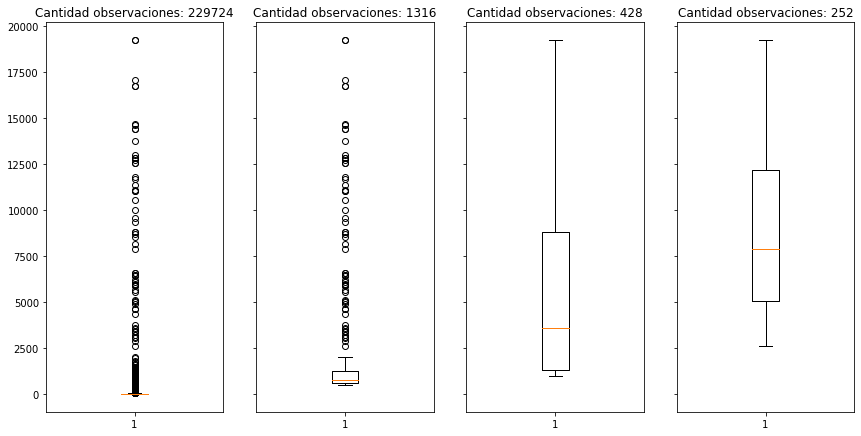

In [63]:
fig, (ax, ax1, ax2, ax3) = plt.subplots(1, 4,figsize=(12,6), sharey=True)
fig.tight_layout()

ax.boxplot(df.query('total > 0')['total'])
ax.set_title(label= f'Cantidad observaciones: {df.query("total > 0").size}');

ax1.boxplot(df.query('total > 500')['total']);
ax1.set_title(label= f'Cantidad observaciones: {df.query("total > 500").size}');

ax2.boxplot(df.query('total > 1000')['total']);            
ax2.set_title(label= f'Cantidad observaciones: {df.query("total > 1000").size}');

ax3.boxplot(df.query('total > 2000')['total']);            
ax3.set_title(label= f'Cantidad observaciones: {df.query("total > 2000").size}');

<AxesSubplot:xlabel='PERIODO'>

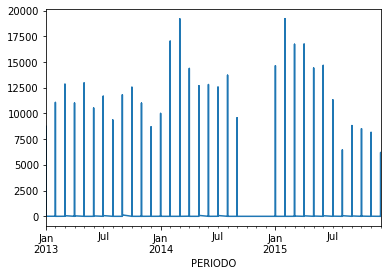

In [64]:
df['total'].plot()

In [69]:
df['2014-01':'2015-12']['total'].idxmax()

Period('2015-02', 'M')

<AxesSubplot:>

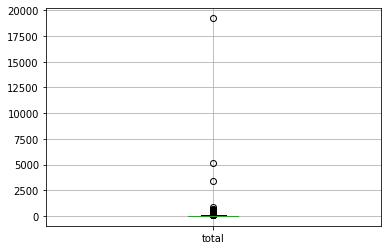

In [74]:
df['2015-02':'2015-02'].boxplot()

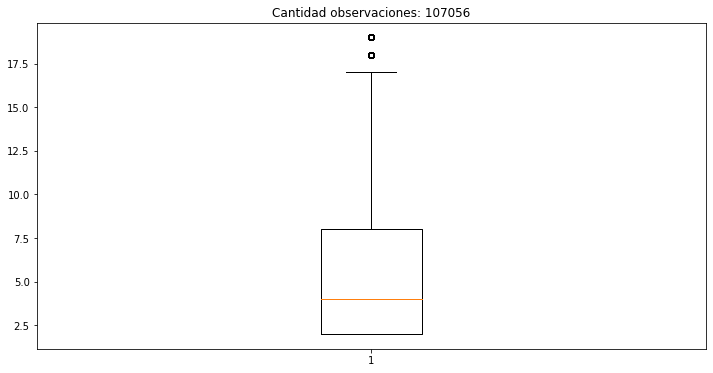

In [85]:
fig, ax = plt.subplots(figsize=(12,6), sharey=True)

ax.boxplot(df.query('total < 20 and total > 1')['total'])
ax.set_title(label= f'Cantidad observaciones: {df.query("total < 20 and total > 1").size}');